In [588]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sn

In [589]:
# Load files
data_path = ''
train = pd.read_csv(data_path + 'Train.csv')
test = pd.read_csv(data_path + 'Test.csv')
sample_submission = pd.read_csv(data_path + 'SampleSubmission.csv')
var_desc = pd.read_csv(data_path + 'VariableDescription.csv')

In [590]:
# Preview files
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


<Axes: >

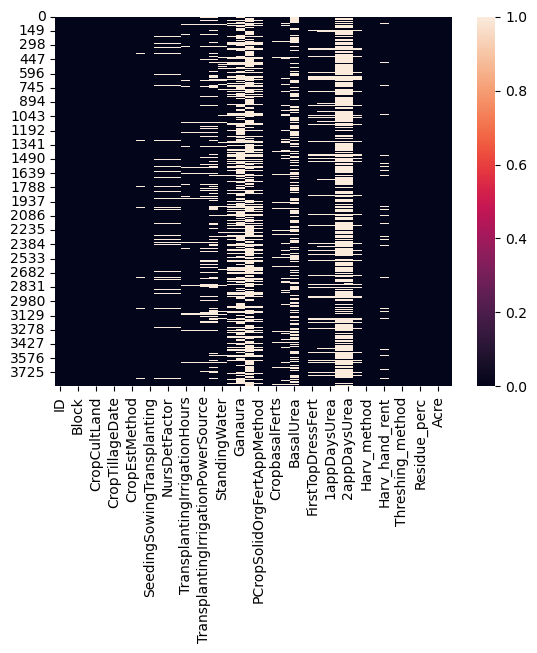

In [591]:
sn.heatmap(train.isna())

In [592]:
test.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre
0,ID_F9XXEXN2ADR2,Jamui,Khaira,20,13,TractorPlough,2022-07-24,4,Manual_PuddledLine,2022-07-03,...,Broadcasting,hand,2022-12-02,500.0,2022-12-28,hand,22,10,plowed_in_soil,0.272727
1,ID_SO3VW2X4QO93,Jamui,Khaira,25,25,TractorPlough,2022-07-24,5,Manual_PuddledRandom,2022-07-08,...,Broadcasting,hand,2022-11-12,150.0,2022-12-20,machine,28,10,plowed_in_soil,0.227273
2,ID_UKUQ7JM8E894,Nalanda,Rajgir,30,30,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-06-24,...,Broadcasting,hand,2022-11-24,1200.0,2022-12-05,machine,28,10,plowed_in_soil,0.281250
3,ID_QUISMWEZR2H4,Vaishali,Mahua,15,10,WetTillagePuddling TractorPlough BullockPlough...,2022-07-04,5,Manual_PuddledRandom,2022-06-20,...,SoilApplied,hand,2022-10-15,300.0,2022-10-25,hand,30,10,plowed_in_soil,0.136364
4,ID_25JGI455VKCZ,Nalanda,Rajgir,30,10,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-21,3,Manual_PuddledRandom,2022-06-24,...,Broadcasting,machine,2022-11-20,NaN,2022-11-20,machine,26,40,plowed_in_soil,0.312500


In [593]:
def valide_date(date):
    try:
        return bool(datetime.datetime.strptime(date,'%Y-%m-%d'))
    except ValueError:
        return False

In [594]:
nan_date = '2022-11-9'

In [595]:
# def define_num_values(data, col_name):
#     result = None
#     size = len(set(data[col_name]))
#     keys = list(set(data[col_name]))
# #     if(not valide_date(data[col_name][0])):
#     values = list(np.arange(1,size+1))
# #     values = list(np.array(values)/max(values))
#     result = dict(list(zip(keys, values)))
# #     else:
# #         values = list(set(data[col_name].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d').day))) 
# #         values = list(np.array(values)/min(values))
# #         result = dict(list(zip(keys, values)))
#     data[col_name] =  data[col_name].replace(result) 
    

In [596]:
def epurate_data_to_string_values(data):
    
#     define_num_values(data, 'District')
#     define_num_values(data, 'Block')
#     define_num_values(data, 'LandPreparationMethod')
#     define_num_values(data, 'CropTillageDate')
#     define_num_values(data, 'Threshing_date')

#     data['RcNursEstDate'] = data['RcNursEstDate'].fillna(nan_date)
#     define_num_values(data, 'RcNursEstDate')
#     data = data.drop(columns='CropEstMethod')
#     test = test.drop(columns='CropEstMethod')

#     define_num_values(data, 'SeedingSowingTransplanting')

#     data['NursDetFactor'] = data['NursDetFactor'].fillna(nan_word)
#     define_num_values(data, 'NursDetFactor')

#     data['TransDetFactor'] = data['TransDetFactor'].fillna(nan_word)
#     define_num_values(data, 'TransDetFactor')

#     data['TransplantingIrrigationSource'] = data['TransplantingIrrigationSource'].fillna(nan_word)
#     define_num_values(data, 'TransplantingIrrigationSource')

# #     data['TransplantingIrrigationPowerSource'] = data['TransplantingIrrigationPowerSource'].fillna(nan_word)
# #     define_num_values(data, 'TransplantingIrrigationPowerSource')

#     data['OrgFertilizers'] = data['OrgFertilizers'].fillna(nan_word)
#     define_num_values(data, 'OrgFertilizers')

#     data['PCropSolidOrgFertAppMethod'] = data['PCropSolidOrgFertAppMethod'].fillna(nan_word)
#     define_num_values(data, 'PCropSolidOrgFertAppMethod')

#     data['CropbasalFerts'] = data['CropbasalFerts'].fillna('nan_word')
#     define_num_values(data, 'CropbasalFerts')

#     define_num_values(data, 'MineralFertAppMethod')

#     data['FirstTopDressFert'] = data['FirstTopDressFert'].fillna(nan_word)
#     define_num_values(data, 'FirstTopDressFert')

#     data['2tdUrea'] = data['2tdUrea'].fillna(0.01)
#     data['2appDaysUrea'] = data['2appDaysUrea'].fillna(0.01)

#     data['MineralFertAppMethod.1'] = data['MineralFertAppMethod.1'].fillna(nan_word)
#     define_num_values(data, 'MineralFertAppMethod.1')

#     define_num_values(data, 'Harv_method')
#     define_num_values(data, 'Harv_date')

#     define_num_values(data, 'Threshing_date')
#     define_num_values(data, 'Threshing_method')
# #     define_num_values(data, 'Stubble_use')

In [597]:
epurate_data_to_string_values(train)
epurate_data_to_string_values(test)

In [598]:
sample_submission.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,0
1,ID_SO3VW2X4QO93,0
2,ID_UKUQ7JM8E894,0
3,ID_QUISMWEZR2H4,0
4,ID_25JGI455VKCZ,0


In [599]:
# Split data for training and local testing

X = train.drop(['ID', 'Yield'], axis = 1)
X =X.select_dtypes(include=np.number)
X
# y = train.Yield


,CultLand,CropCultLand,CropTillageDepth,RcNursEstDate,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,...,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_method,Harv_hand_rent,Residue_length,Residue_perc,Acre
0,45,40,5,45,2.0,5.0,200.0,2.0,NaN,NaN,...,20.0,15.0,18.0,NaN,NaN,1,NaN,30,40,0.312500
1,26,26,5,52,2.0,5.0,125.0,3.0,NaN,NaN,...,10.0,20.0,39.0,NaN,NaN,2,3.0,24,10,0.312500
2,10,10,6,52,2.0,4.0,80.0,2.0,1.0,1.0,...,NaN,5.0,65.0,NaN,NaN,2,480.0,30,10,0.148148
3,15,15,6,1,2.0,NaN,NaN,NaN,1.0,NaN,...,3.0,5.0,5.0,NaN,NaN,2,240.0,26,10,0.222222
4,60,60,4,5,2.0,9.0,300.0,2.0,NaN,NaN,...,30.0,30.0,26.0,NaN,NaN,1,NaN,24,40,0.468750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,28,28,6,31,NaN,7.0,360.0,5.0,1.0,NaN,...,12.0,12.0,45.0,NaN,NaN,1,NaN,25,40,0.375000
3866,5,5,5,27,1.0,3.0,NaN,3.0,NaN,NaN,...,NaN,6.0,45.0,6.0,6.0,2,4.0,30,10,0.136364
3867,50,45,5,24,1.0,6.0,120.0,5.0,1.0,NaN,...,24.0,NaN,NaN,NaN,NaN,2,1200.0,25,10,0.375000
3868,20,20,3,2,4.0,2.0,NaN,9.0,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,2,100.0,25,10,0.227273


In [600]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

# Instantiate model
model = RandomForestRegressor(random_state = 1234)

# Fit model
model.fit(X_train.fillna(80.0), y_train)

# Make predictions
preds = model.predict(X_test.fillna(80.0))

# Measure model performance
mean_squared_error(y_test, preds, squared=False)

371.333260749978

In [601]:
# Make predictions on the Zindi test set
test_df = test[X.columns]
preds = model.predict(test_df.fillna(80.0))

# Create submisiion file to be uploaded to Zindi for scoring
sub = pd.DataFrame({'ID': test.ID, 'Yield': preds})
sub.to_csv('BenchmarkSubmission.csv', index = False)

sub.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,696.700000
1,ID_SO3VW2X4QO93,415.036667
2,ID_UKUQ7JM8E894,502.180000
3,ID_QUISMWEZR2H4,306.800000
4,ID_25JGI455VKCZ,593.340000
